In [2]:
import math
from math import radians, degrees
import numpy as np
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

m1 = 0.050  # shell mass
m2 = 0.100  # pendulum mass
r1 = 0.06   # distance from foot to shell CoM 
r_j = 0.10  # distance from foot to pendulum axis
r2 = 0.06   # pendulum length
I1 = 2/5*m1*r_j**2   # shell inertia about its CoM (approx. solid sphere)
I2 = 1/12*m2*r2**2   # pendulum inertia about its CoM (approx. rod about center?)
g = 9.81    # gravity

def acrobot_dstate(state, tau):
    [theta1, dtheta1, theta2, dtheta2] = state

    # 352 operations
    x0 = I2**2
    x1 = I1**2
    x2 = m2**2
    x3 = r2**4
    x4 = x2*x3
    x5 = r2**2
    x6 = m2*x5
    x7 = m1**2
    x8 = r1**4*x7
    x9 = r_j**4
    x10 = I2*x2
    x11 = r1**2
    x12 = m1*x11
    x13 = r_j**2
    x14 = m2*x13
    x15 = I1*I2
    x16 = 2*x15
    x17 = m2*r_j
    x18 = math.cos(theta2)
    x19 = r2*x18
    x20 = x13*x5
    x21 = I1*x2
    x22 = x20*x21
    x23 = x10*x20
    x24 = I1*x6
    x25 = 2*x12
    x26 = I2*x12
    x27 = 2*x6
    x28 = 2*x26
    x29 = 2*x18
    x30 = r2**3
    x31 = r_j*x30
    x32 = x21*x31
    x33 = r_j**3
    x34 = x10*x33
    x35 = 2*x19
    x36 = m2**3
    x37 = math.sin(theta2)
    x38 = x37**2
    x39 = x36*x38
    x40 = x2*x20
    x41 = x2*x31
    x42 = x30*x33
    x43 = x38*x40
    x44 = I1*tau
    x45 = I2*tau
    x46 = math.sin(theta1)
    x47 = tau*x12
    x48 = dtheta1**2
    x49 = x37*x48
    x50 = r2*x49
    x51 = x17*x50
    x52 = dtheta2**2
    x53 = x37*x52
    x54 = r2*x53
    x55 = x17*x54
    x56 = dtheta1*dtheta2
    x57 = x37*x56
    x58 = r2*x57
    x59 = x17*x58
    x60 = tau*x40
    x61 = r1**3
    x62 = x0*x17
    x63 = 2*x37*x56
    x64 = r2*x63
    x65 = math.sin(theta1 + theta2)
    x66 = g*r2
    x67 = x65*x66
    x68 = m1*r1
    x69 = x17*x68
    x70 = I2*x69
    x71 = r2**5
    x72 = r_j*x36
    x73 = x71*x72
    x74 = x36*x37*x52
    x75 = x10*x13
    x76 = x10*x31
    x77 = math.sin(theta1 - theta2)
    x78 = x66*x77
    x79 = 2*theta2
    x80 = 2*x76
    x81 = g*x41*x68
    x82 = (1/2)*g*math.sin(x79 + theta1)
    x83 = x5*x82
    x84 = math.sin(x79)
    x85 = x41*x49
    x86 = x41*x53
    x87 = 3*theta2
    x88 = (1/2)*x36
    x89 = r_j*x2
    x90 = x83*x89
    x91 = g*x46
    x92 = I2*x91
    x93 = 2*x17
    x94 = m2*x67
    x95 = (1/2)*x67
    x96 = x13*x2
    x97 = (1/2)*x78
    ddth1_num = (I1*I2*g*m1*r1*x46 + I1*I2*g*m2*r_j*x46 + I1*g*m1*m2*r1*x46*x5 + (1/2)*I1*g*r_j*x2*x46*x5 + I1*m2*r2*r_j*tau*x18 + (1/2)*I1*x13*x2*x48*x5*x84 + 2*I2*dtheta1*dtheta2*x13*x2*x5*x84 + I2*g*m1*m2*r1*x13*x46 + 2*I2*g*m1*m2*r1*x46*x5 + I2*g*m1*m2*r_j*x11*x46 + (3/2)*I2*g*r_j*x2*x46*x5 + I2*g*x2*x33*x46 + I2*g*x46*x61*x7 + 3*I2*m2*r2*r_j*tau*x18 + (3/2)*I2*x13*x2*x48*x5*x84 + I2*x13*x2*x5*x52*x84 + 2*dtheta1*dtheta2*x13*x3*x36*x84 + g*m1*r1*x0*x46 + g*m1*r1*x13*x2*x46*x5 + g*m1*r1*x2*x3*x46 + (1/2)*g*m1*r_j*x11*x2*x46*x5 + g*m2*r_j*x0*x46 + g*m2*x46*x5*x61*x7 + (1/2)*g*r_j*x3*x36*x46 + (1/2)*g*x13*x30*x36*math.sin(x87 + theta1) - g*x13*x30*x77*x88 + (1/2)*g*x33*x36*x46*x5 + m1*m2*r2*r_j*tau*x11*x18 + (1/2)*m1*x11*x13*x2*x48*x5*x84 + r2*tau*x18*x2*x33 + 3*r_j*tau*x18*x2*x30 - r_j*x10*x83 - r_j*x21*x83 - r_j*x71*x74 - tau*x0 - tau*x15 - tau*x4 - x12*x45 - x12*x85 - x12*x86 - x12*x90 + (3/2)*x13*x3*x36*x48*x84 + x13*x3*x36*x52*x84 - x14*x45 - x15*x51 - x15*x55 - x16*x59 - x25*x41*x57 - x26*x51 - x26*x55 - x27*x45 - x28*x59 - x3*x72*x82 - x32*x49 - x32*x53 - x32*x63 - x33*x36*x83 - x34*x50 - x34*x54 - x34*x64 - 3/2*x36*x42*x49 - x36*x42*x63 + (1/2)*x36*x48*x5*x84*x9 - x42*x48*x88*math.sin(x87) - x42*x74 - x44*x6 - x47*x6 - x49*x73 - x49*x80 - x50*x62 - x53*x80 - x54*x62 - 4*x57*x76 - x60*math.cos(x79) - 2*x60 - x62*x64 - x63*x73 - x65*x81 - x67*x70 - x67*x75 - x70*x78 - x75*x78 - x77*x81)/(I1*x0 + I1*x4 + I2*x1 + I2*x8 + x0*x12 + x0*x14 + x1*x6 + x10*x9 + x12*x16 - x12*x29*x41 + x12*x4 + x12*x40 + x12*x43 + x13*x3*x39 + x14*x16 + x14*x28 - x16*x17*x19 + x16*x6 - x17*x26*x35 + x22*x38 + x22 + x23*x38 + x23 + x24*x25 + x26*x27 - x29*x32 - x29*x39*x42 - x34*x35 + x39*x5*x9 + x6*x8)
    ddth2_num = (I1*x51 - I1*x94 + I2*x51 + I2*x55 + I2*x58*x93 + tau*x14 - tau*x19*x93 + tau*x6 + x12*x51 - x12*x94 - x17*x92 + x2*x33*x50 - x40*x48*x84 - 1/2*x40*x52*x84 - x40*x56*x84 + x41*x63 + x44 + x45 + x47 - 1/2*x5*x89*x91 - x6*x68*x91 - x68*x92 + x69*x95 + x69*x97 + x85 + x86 + x90 - x95*x96 + x96*x97)/(I2*x14 + x12*x6 + x15 + x24 + x26 + x43)

    return [dtheta1, ddth1_num, dtheta2, ddth2_num]

def get_linear_quantities(states, dstates):
    [theta1, dtheta1, theta2, dtheta2] = states
    [dtheta1, ddtheta1, dtheta2, ddtheta2] = dstates
    # 83 operations
    x0 = math.sin(theta1)
    x1 = r1*x0
    x2 = math.cos(theta1)
    x3 = r1*x2
    x4 = r_j*x0
    x5 = -x4
    x6 = r_j*x2
    x7 = theta1 + theta2
    x8 = math.sin(x7)
    x9 = r2*x8
    x10 = x5 + x9
    x11 = math.cos(x7)
    x12 = r2*x11
    x13 = -r_j*x2 + x12
    x14 = dtheta2*x12
    x15 = dtheta2*x9
    x16 = dtheta1**2
    x17 = dtheta1 + dtheta2
    p_1x = -x1
    p_1y = x3
    p_jx = x5
    p_jy = x6
    p_2x = x10
    p_2y = -x13
    v_1x = -dtheta1*x3
    v_1y = -dtheta1*x1
    v_2x = dtheta1*x13 + x14
    v_2y = dtheta1*x10 + x15
    a_1x = r1*(-ddtheta1*x2 + x0*x16)
    a_1y = -r1*(ddtheta1*x0 + x16*x2)
    a_2x = ddtheta1*x13 + ddtheta2*x12 - dtheta1*(-dtheta1*x4 + r2*x17*x8) - x15*x17
    a_2y = ddtheta1*x10 + ddtheta2*x9 + dtheta1*(-dtheta1*x6 + r2*x11*x17) + x14*x17
    return [p_1x, p_1y, p_jx, p_jy, p_2x, p_2y, v_1x, v_1y, v_2x, v_2y, a_1x, a_1y, a_2x, a_2y]

def simple_rk4(dynamics, t, y, dt):
    k1 = dt * dynamics(t, y)
    k2 = dt * dynamics(t + dt/2, y + k1/2)
    k3 = dt * dynamics(t + dt/2, y + k2/2)
    k4 = dt * dynamics(t + dt, y + k3)
    t_new = t + dt
    y_new = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_new, y_new

def controlled_dynamics(t, state):
    #controller
    tau_max = 0.2
    v_max = 1000 * 2*np.pi/60
    tau = tau_max * (1 - state[3] / v_max)

    return acrobot_dstate(state, tau)


def simulate(state, do_log=False):
    ts = []
    states = []
    logs = []
    t = 0
    t_bound = 1
    while t < t_bound:
        [theta1, dtheta1, theta2, dtheta2] = state

        if len(ts) % 10 == 0:
            #controller
            volt = 1 # from 0 to 1
        tau_max = 0.2
        omega_max = 1000 * 2*np.pi/60
        tau = tau_max * (volt - dtheta2/omega_max)


        def controlled_dynamics(t, state):
            return np.array(acrobot_dstate(state, tau))
        [t, state] = simple_rk4(controlled_dynamics, t, state, dt=0.001)
        
        ''' 
        Liftoff condition:
        normal force < 0 and y velocity > 0
        Fnet1 = Fn - m1*g - F12 = m1*a1_y
        Fnet2 = F12 - m2*g = m2*a2_y
        Fn = m1*a1_y + F12 
        F12 = m2*a2_y + m2*g
        Fn = m1*a1_y + m2*a2_y + m2*g
        '''
        dstate = acrobot_dstate(state, tau)
        [p_1x, p_1y, p_jx, p_jy, p_2x, p_2y, v_1x, v_1y, v_2x, v_2y, a_1x, a_1y, a_2x, a_2y] = get_linear_quantities(state, dstate)

        Fn = m1*a_1y + m2*a_2y + m2*g #normal force of ground on m1
        v_comx = (m1*v_1x + m2*v_2x) / (m1+m2)
        v_comy = (m1*v_1y + m2*v_2y) / (m1+m2)
        
        if do_log:
            ts.append(t)
            states.append(state)
            logs.append({
                'Fn': Fn,
                'tau': tau,
                'p_1x': p_1x,
                'p_1y': p_1y,
                'p_jx': p_jx,
                'p_jy': p_jy,
                'p_2x': p_2x,
                'p_2y': p_2y,
                'v_1x': v_1x,
                'v_1y': v_1y,
                'v_2x': v_2x,
                'v_2y': v_2y,
                'a_1x': a_1x,
                'a_1y': a_1y,
                'a_2x': a_2x,
                'a_2y': a_2y,
                'v_comx': v_comx,
                'v_comy': v_comy,
            })

        if(Fn < 0 or (p_jy < r2)):
            airtime = 2*v_comy / g
            jump_height = v_comy**2 / (2*g)
            # jump_height = v_comy - abs(v_comx)
            jump_length = airtime * v_comx
            if do_log:
                print(f'Simulated {len(ts)} steps')
                print(f"Jump {jump_height:.4f} m high, {jump_length:.4f} m long over {airtime:.4f} s")
                print(f"Takeoff velocity: {math.sqrt(v_comx**2 + v_comy**2):.3f} m/s at {math.degrees(math.atan2(v_comy, v_comx)):.1f} degrees")
                ts = np.array(ts)
                states = np.array(states)

                # Convert logs from array of dicts to dict of arrays
                log_arrays = {}
                for key in logs[0].keys():
                    log_arrays[key] = np.array([log[key] for log in logs])

                return jump_height, ts, states, log_arrays
            else:
                return jump_height
    print("did not finish in time")

#              theta1, dtheta1, theta2, dtheta2
# state_init = [radians(30), 0, radians(45), 0]
# state_init = [radians(0), 0, radians(0), 0]
# state_init = [radians(20), 0, radians(-30), 0]
state_init = [0.229, 0, -0.242, 0]
jump_height, ts, states, log_arrays = simulate(state_init, do_log=True)

Simulated 101 steps
Jump 0.0932 m high, -0.0099 m long over 0.2756 s
Takeoff velocity: 1.352 m/s at 91.5 degrees


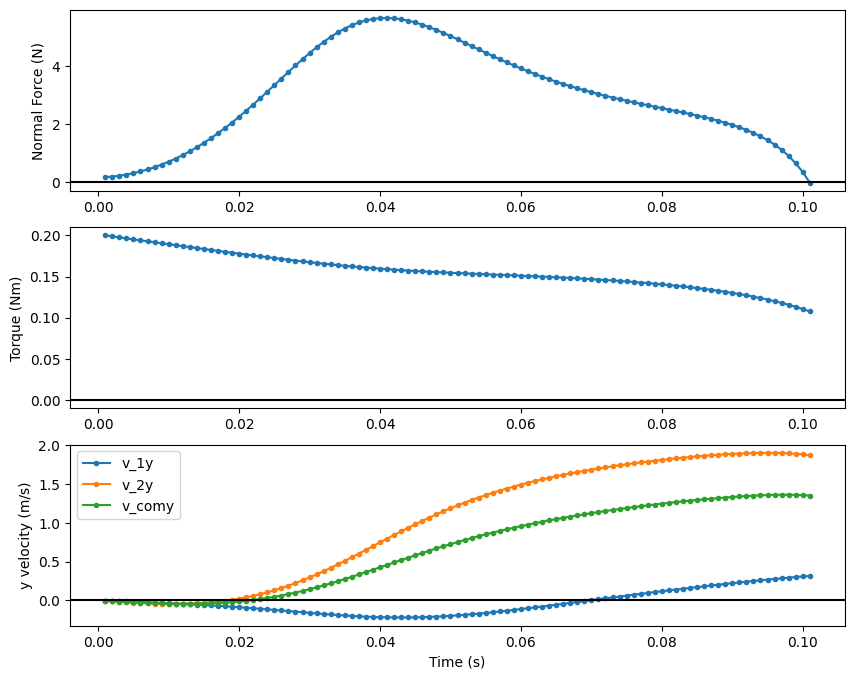

In [154]:
# Plot normal force over time
fig, axs = plt.subplots(3, 1, figsize=(10,8))
axs[0].plot(ts, log_arrays['Fn'], '.-')
axs[0].axhline(0, color='black')
axs[0].set_ylabel('Normal Force (N)')

axs[1].plot(ts, log_arrays['tau'], '.-')
axs[1].axhline(0, color='black')
axs[1].set_ylabel('Torque (Nm)')

axs[2].plot(ts, log_arrays['v_1y'], '.-', label='v_1y')
axs[2].plot(ts, log_arrays['v_2y'], '.-', label='v_2y')
axs[2].plot(ts, log_arrays['v_comy'], '.-', label='v_comy')
axs[2].axhline(0, color='black')
axs[2].set_ylabel('y velocity (m/s)')
axs[2].legend()

plt.xlabel('Time (s)')
plt.show()


In [165]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Animation function
def animate(frame):
    ax.clear()

    x1 = log_arrays['p_1x'][frame]
    y1 = log_arrays['p_1y'][frame]
    xj = log_arrays['p_jx'][frame]
    yj = log_arrays['p_jy'][frame]
    x2 = log_arrays['p_2x'][frame]
    y2 = log_arrays['p_2y'][frame]
    
    # Plot origin point
    ax.plot(0, 0, 'ko', markersize=10)
    ax.axhline(y=0, color='k')
    
    # Plot first link (origin to joint)
    ax.plot([0, xj], [0, yj], 'b-', linewidth=2)
    
    # Plot second link (joint to end)
    ax.plot([xj, x2], [yj, y2], 'g-', linewidth=2)
    
    # Plot point P1
    ax.plot(x1, y1, 'bo', markersize=8, label='shell CoM')
    
    # Plot joint point
    ax.plot(xj, yj, 'mo', markersize=8, label='actuator')
    
    # Plot end point
    ax.plot(x2, y2, 'go', markersize=8, label='pendulum CoM')

    # Plot velocity vectors as arrows
    # For P1
    ax.quiver(x1, y1, log_arrays['v_1x'][frame], log_arrays['v_1y'][frame], 
              angles='xy', scale_units='xy', scale=30, color='b', width=0.003,
              label='shell velocity')
    
    # For P2  
    ax.quiver(x2, y2, log_arrays['v_2x'][frame], log_arrays['v_2y'][frame],
              angles='xy', scale_units='xy', scale=30, color='g', width=0.003, 
              label='pendulum velocity')
    
    # Plot normal force vector at origin
    ax.quiver(0, 0, np.zeros_like(log_arrays['Fn'][frame]), log_arrays['Fn'][frame], 
              angles='xy', scale_units='xy', scale=40, color='r', width=0.005,
              label='normal Force')
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.02, 0.2)
    
    # Add grid and legend
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Acrobot jumper t={1000*ts[frame]:03.0f} ms, CoM:({log_arrays["v_comx"][frame]:.2f},{log_arrays["v_comy"][frame]:.2f}) m/s')


# Create animation
anim = FuncAnimation(fig, animate, frames=len(states), 
                    interval=20, blit=False, repeat_delay=200, repeat=True)
print('done making animation, saving gif')
# Save as GIF
writer = PillowWriter(fps=50)
anim.save(f'gifs/acrobot_motion_{state_init[0]:.3f}_{state_init[2]:.3f}.gif', writer=writer)
plt.close()

done making animation, saving gif


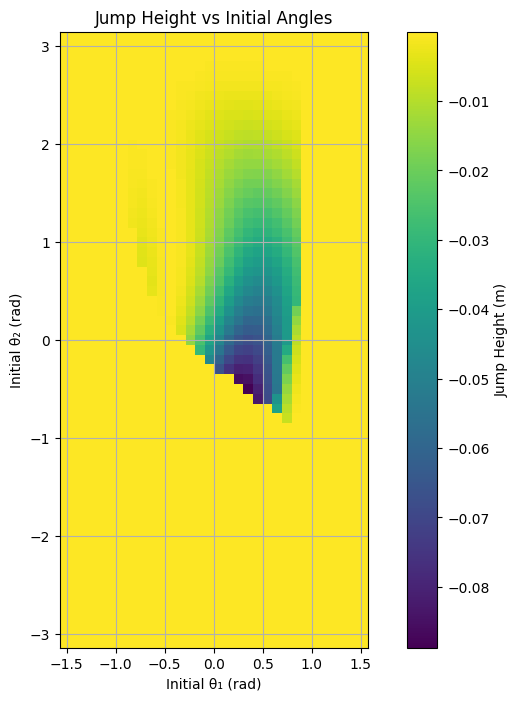

Jumped 0.089m high at ideal configuration
state_init = [0.329, 0, -0.542, 0]


In [11]:
m1 = 0.050  # shell mass
m2 = 0.100  # pendulum mass
r1 = 0.14   # distance from foot to shell CoM 
r_j = 0.10  # distance from foot to pendulum axis
r2 = 0.06   # pendulum length
I1 = 2/5*m1*r_j**2   # shell inertia about its CoM (approx. solid sphere)
I2 = 1/3*m2*r2**2   # pendulum inertia about its CoM (approx. rod about center?)
g = 9.81    # gravity

def objective(x):
    state = [x[0], 0, x[1], 0]
    return -simulate(state)

# Create a 2D grid of initial angles
theta1_range = np.arange(-np.pi/2, np.pi/2, 0.1)
theta2_range = np.arange(-np.pi, np.pi, 0.1)
theta1_grid, theta2_grid = np.meshgrid(theta1_range, theta2_range)

# Initialize results array
results = np.zeros_like(theta1_grid)

# Evaluate objective function for each point
for i in range(len(theta1_range)):
    for j in range(len(theta2_range)):
        results[j,i] = objective([theta1_grid[j,i], theta2_grid[j,i]])

# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(results, extent=[-np.pi/2, np.pi/2, -np.pi, np.pi], 
           origin='lower', aspect='equal', cmap='viridis')
plt.colorbar(label='Jump Height (m)')
plt.xlabel('Initial θ₁ (rad)')
plt.ylabel('Initial θ₂ (rad)')
plt.title('Jump Height vs Initial Angles')

# Add grid
plt.grid(True)

# Show plot
plt.show()

# Find indices of maximum value
min_idx = np.unravel_index(np.argmin(results), results.shape)

# Get corresponding angles and maximum height
min_theta1 = theta1_range[min_idx[1]]  # Note: reversed indices due to meshgrid
min_theta2 = theta2_range[min_idx[0]]
min_height = -results[min_idx]  # Negative since objective was negated

print(f"Jumped {min_height:.3f}m high at ideal configuration")
print(f"state_init = [{min_theta1:.3f}, 0, {min_theta2:.3f}, 0]")